In [1]:
import distributions as dist
import numpy as np
import matplotlib.pyplot as plt
import ppi
import ppi_py
import scipy.stats as stats
import pandas as pd
import ml_models as ml

import yaml
import os
import sys
import argparse
import plotting
import copy

C:\Users\huanziy\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Notebook for testing things that are/aren't working

In [4]:
def test(config):
    rho_vals = [10, 100, 1000, 10000, 100000]
    pop_config = config['experiment']['parameters']['gold_population']
    for rho in rho_vals:
        pop_config['y_population']['rho'] = rho
        x_gold, y_gold = dist.sample_population(pop_config)

        print(pop_config['x_population']['size'])

        # print the gold population standard error
        print("Gold Population Standard Error: ", stats.sem(y_gold))

        # plot the x population and the y population
        fig, ax = plt.subplots(2)
        ax[0].hist(x_gold, bins=50)
        ax[0].set_title("X Population")
        ax[1].scatter(x_gold, y_gold, alpha=0.5)
        ax[1].set_title("Y Population")
        plt.show()

        ml_config = config['experiment']['model']

        train_config = copy.deepcopy(pop_config)
        train_config['x_population']['size'] = 10000

        x_train, y_train = dist.sample_population(train_config)

        model = ml.train_model(x_train, y_train, ml_config)

        y_gold_fitted = model.predict(x_gold)

        # plot the gold population and the fitted gold population

        fig, ax = plt.subplots(2)

        ax[0].scatter(x_gold, y_gold, alpha=0.5)
        ax[0].set_title("Gold Population")
        ax[1].scatter(x_gold, y_gold_fitted, alpha=0.5)
        ax[1].set_title("Fitted Gold Population")
        plt.show()
    

    return 

128
Gold Population Standard Error:  [27.58303182]


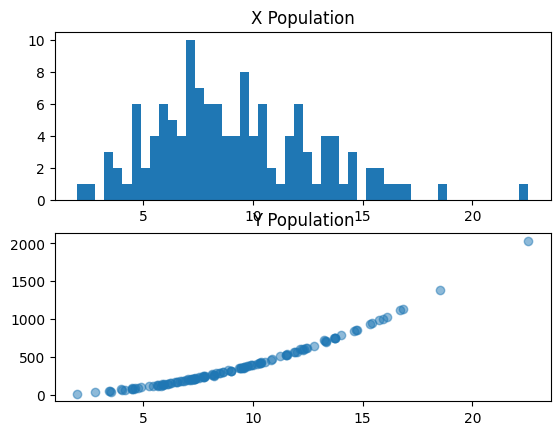

[I 2024-07-26 18:45:59,413] A new study created in memory with name: no-name-2dc65bf4-8f5a-4ce0-bd7c-8826aa58e237
[I 2024-07-26 18:45:59,781] Trial 0 finished with value: 1141.4985567465985 and parameters: {'n_estimators': 111, 'max_depth': 17}. Best is trial 0 with value: 1141.4985567465985.
[I 2024-07-26 18:45:59,969] Trial 1 finished with value: 2796.259269400753 and parameters: {'n_estimators': 70, 'max_depth': 10}. Best is trial 0 with value: 1141.4985567465985.
[I 2024-07-26 18:46:00,169] Trial 2 finished with value: 881.7545905836126 and parameters: {'n_estimators': 90, 'max_depth': 24}. Best is trial 2 with value: 881.7545905836126.
[I 2024-07-26 18:46:07,984] Trial 3 finished with value: 2215.66946756375 and parameters: {'n_estimators': 58, 'max_depth': 30}. Best is trial 2 with value: 881.7545905836126.
[I 2024-07-26 18:46:08,233] Trial 4 finished with value: 1014.7453747426528 and parameters: {'n_estimators': 117, 'max_depth': 18}. Best is trial 2 with value: 881.75459058361

KeyboardInterrupt: 

In [6]:
config = "../configs/test.yaml"
with open(config, 'r') as stream:
    config = yaml.safe_load(stream)
test(config)